Residual Analysis with Autocorrelation

This example shows how to use autocorrelation with a confidence interval to analyze the residuals of a least-squares fit to noisy data. The residuals are the differences between the fitted model and the data. In a signal-plus-white noise model, if you have a good fit for the signal, the residuals should be white noise.

Create a noisy data set consisting of a 1st-order polynomial (straight line) in additive white Gaussian noise. The additive noise is a sequence of uncorrelated random variables following a N(0,1) distribution. This means that all the random variables have mean zero and unit variance. Set the random number generator to the default settings for reproducible results.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import erfcinv
from scipy.fft import fft

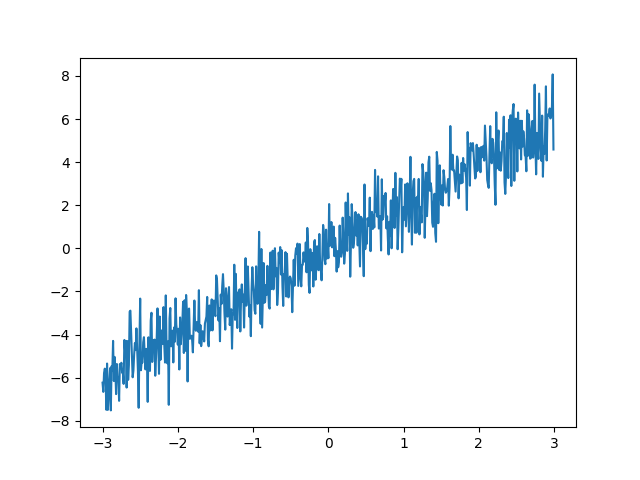

In [2]:
x = np.arange(-3, 3, 0.01)
y = 2 * x + np.random.randn(len(x))
plt.plot(x, y)
plt.show()

Use polyfit to find the least-squares line for the noisy data. Plot the original data along with the least-squares fit.

In [3]:
def linearRegression(x, y):
    length = len(x)
    mx = x.mean()
    a =  a = (y * (x - mx)).sum() / ((x ** 2).sum() - x.sum() ** 2 / length)
    b = (y - a * x).sum() / length
    return a, b

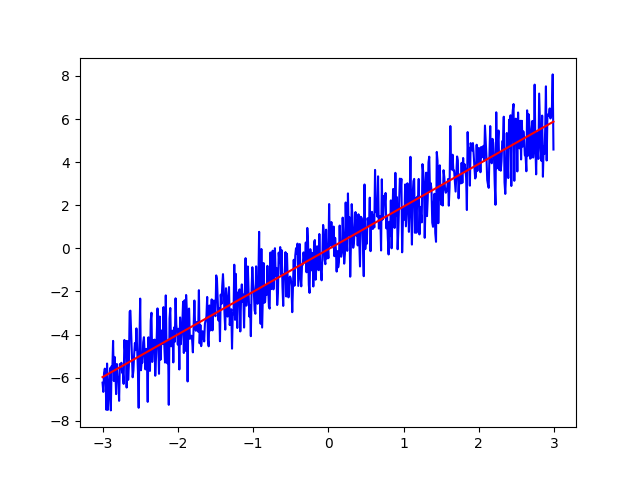

In [4]:
a, b = linearRegression(x, y)
yfit = a * x + b

plt.plot(x, y, 'b')
plt.plot(x, yfit, 'r')
plt.show()

Find the residuals. Obtain the autocorrelation sequence of the residuals to lag 50.

In [5]:
def autocorrelation(x, lags):
    n = len(x)
    x = np.array(x)
    result = [np.correlate(x[i:],x[:n-i])\
            /(x[i:].std()*x[:n-i].std()*(n-i)) for i in range(0, lags+1)]
    lag = np.arange(0, lags+1, 1)
    return result, lag

In [6]:
residuals = y - yfit
xc,lags = autocorrelation(residuals, 50);

When you inspect the autocorrelation sequence, you want to determine whether or not there is evidence of autocorrelation. In other words, you want to determine whether the sample autocorrelation sequence looks like the autocorrelation sequence of white noise. If the autocorrelation sequence of the residuals looks like the autocorrelation of a white noise process, you are confident that none of the signal has escaped your fit and ended up in the residuals. In this example, use a 99%-confidence interval. To construct the confidence interval, you need to know the distribution of the sample autocorrelation values. You also need to find the critical values on the appropriate distribution between which lie 0.99 of the probability. Because the distribution in this case is Gaussian, you can use complementary inverse error function, erfcinv. The relationship between this function and the inverse of the Gaussian cumulative distribution function is described on the reference page for erfcinv.

Find the critical value for the 99%-confidence interval. Use the critical value to construct the lower and upper confidence bounds.

In [7]:
conf99 = np.sqrt(2) * erfcinv(0.01)
lconf = -conf99 / np.sqrt(len(x))
hconf = conf99 / np.sqrt(len(x))
lline = lconf * np.ones(len(lags))
hline = hconf * np.ones(len(lags))

Plot the autocorrelation sequence along with the 99%-confidence intervals.

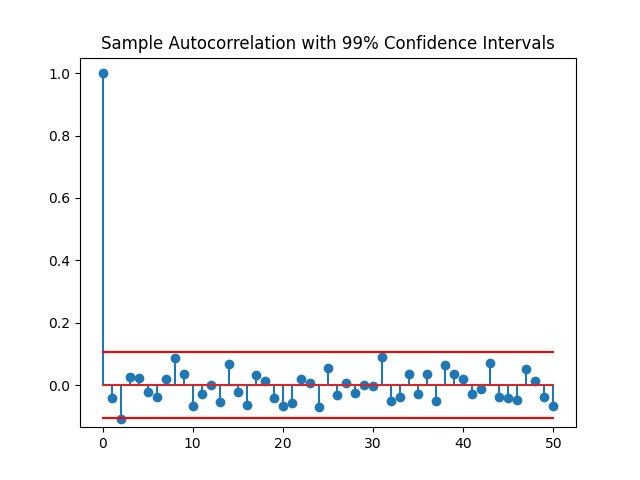

In [8]:
plt.stem(lags, xc)
plt.ylim([lconf-0.03, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

Except at zero lag, the sample autocorrelation values lie within the 99%-confidence bounds for the autocorrelation of a white noise sequence. From this, you can conclude that the residuals are white noise. More specifically, you cannot reject that the residuals are a realization of a white noise process.

Create a signal consisting of a sine wave plus noise. The data are sampled at 1 kHz. The frequency of the sine wave is 100 Hz. Set the random number generator to the default settings for reproducible results.

In [9]:
fs = 1000
t = np.arange(0, 1-1/fs, 1/fs)
x = np.cos(2* np.pi * 100 * t) + np.random.randn(len(t))

Use the discrete Fourier transform (DFT) to obtain the least-squares fit to the sine wave at 100 Hz. The least-squares estimate of the amplitude is 2 / N times the DFT coefficient corresponding to 100 Hz, where N is the length of the signal. The real part is the amplitude of a cosine at 100 Hz and the imaginary part is the amplitude of a sine at 100 Hz. The least-squares fit is the sum of the cosine and sine with the correct amplitude. In this example, DFT bin 101 corresponds to 100 Hz.

In [10]:
xdft = fft(x)
ampest = 2 / len(x) * xdft[100]
xfit = ampest.real * np.cos(2 * np.pi * 100 * t) + ampest.imag * np.sin(2 * np.pi * 100 * t)

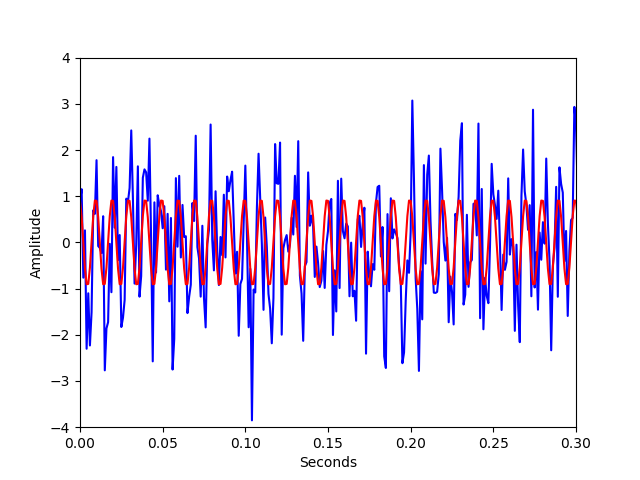

In [11]:
plt.plot(t, x, 'b')
plt.plot(t, xfit, 'r')
plt.axis([0, 0.30, -4, 4])
plt.xlabel('Seconds')
plt.ylabel('Amplitude')
plt.show()

In [12]:
residuals = x - xfit
xc,lags = autocorrelation(residuals, 50);

In [13]:
lconf = -conf99 / np.sqrt(len(x))
hconf = conf99 / np.sqrt(len(x))
lline = lconf * np.ones(len(lags))
hline = hconf * np.ones(len(lags))

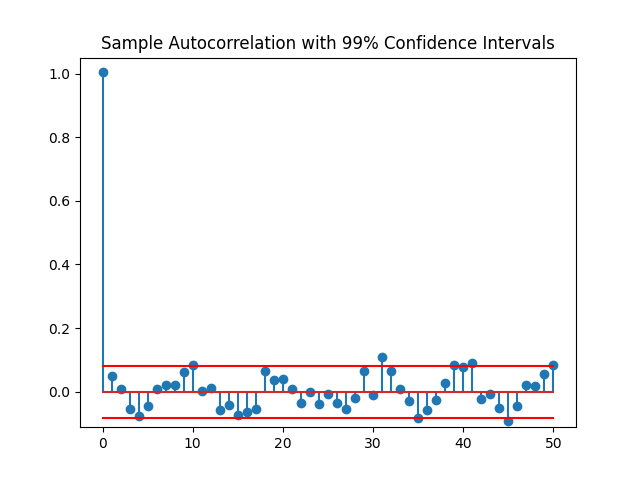

In [14]:
plt.stem(lags, xc)
plt.ylim([lconf-0.03, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

Again, you see that except at zero lag, the sample autocorrelation values lie within the 99%-confidence bounds for the autocorrelation of a white noise sequence. From this, you can conclude that the residuals are white noise. More specifically, you cannot reject that the residuals are a realization of a white noise process.

Finally, add another sine wave with a frequency of 200 Hz and an amplitude of 3/4. Fit only the sine wave at 100 Hz and find the sample autocorrelation of the residuals.

In [15]:
x = x + 3/4 * np.sin(2 * np.pi * 200 * t)
xdft = fft(x)
ampest = 2 / len(x) * xdft[100]
xfit = ampest.real * np.cos(2 * np.pi * 100 * t) + ampest.imag * np.sin(2 * np.pi * 100 * t)
residuals = x - xfit
xc,lags = autocorrelation(residuals, 50);

Plot the sample autocorrelation along with the 99%-confidence intervals.

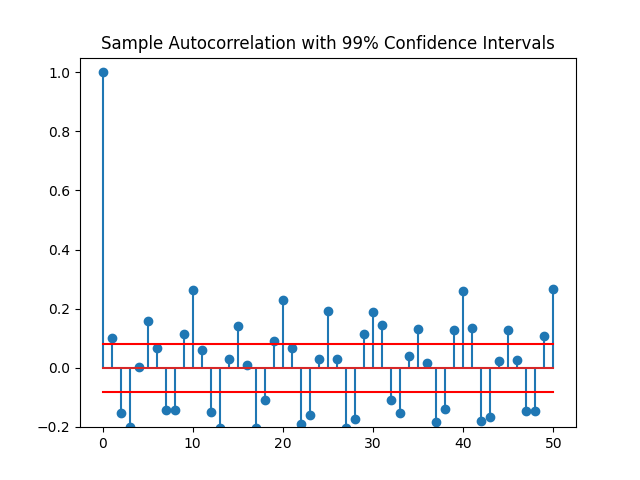

In [16]:
plt.stem(lags, xc)
plt.ylim([lconf-0.12, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

In this case, the autocorrelation values clearly exceed the 99%-confidence bounds for a white noise autocorrelation at many lags. Here you can reject the hypothesis that the residuals are a white noise sequence. The implication is that the model has not accounted for all the signal and therefore the residuals consist of signal plus noise.